<a href="https://colab.research.google.com/github/Anastasios-K/Classification/blob/master/WineQualClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
from pathlib import Path
path = Path('/content/drive/My Drive/DS Projects/Classification/Wine Quality')
directories = list(path.iterdir())
# ------> Look for further selection from the directories

# Add extra datasets into the parent directory

In [0]:
dimensions = 12
attributes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality']

# This is to create a dict with all dataframes
# Multiple files from cloud compose the final dataframe
# The dimensionality of the data and the attributes' names are required
# The list of the datasets is created before

def DF_dict_generator(list_of_datasets, dimensionality, attributes):
  wine_dict = {}
  for i, item in enumerate(list_of_datasets):
    wine_dict["df{0}".format(i+1)]=pd.read_csv(item, delimiter=';', skip_blank_lines=False,skipinitialspace=True)
    if len(wine_dict["df{0}".format(i+1)].columns) != dimensionality:
      wine_dict["df{0}".format(i+1)]=pd.read_csv(item, delimiter=';', skip_blank_lines=False,skipinitialspace=True, skiprows=[0], names=attributes)
    else:
      pass
    wine_dict["df{0}".format(i+1)]['wine type'] = pd.Series(i+1, index=wine_dict["df{0}".format(i+1)].index)
  df = pd.concat(wine_dict, ignore_index=True)
  return(df)

In [0]:
#### ---------> use of the above function "DF_dict_generator"
df = DF_dict_generator(directories,12,attributes)

In [0]:
# It is --- N O T --- necesary
# Use it to test the below quality function
# This is to add some missing values to the data (currently 20%)
# Change the amount of missing values by changing the "Error_PerCent" variable
# The below libraries are required

import random as rng
import numpy as np

def Null_test(df):
  Error_PerCent = 0.2
  rng.seed()
  num_of_NAN = np.round(len(df)*len(df.columns)*Error_PerCent, decimals=0)
  for x in range(int(num_of_NAN)):
      df.iloc[rng.randint(0,len(df)-1),rng.randint(0,len(df.columns)-1)]=np.nan
  return(df)
if __name__ == "__main__":
    pass


In [0]:
#### ---------> use of the above function "Null_test"
df = Null_test(df)

In [0]:
# This is to do the following:
# 1. Detecting missing values
# 2. Removing an attribute if it includes more than 20% of missing values
# 3. Filling up the NaN values using the average of the last and next valid values

# Change the "tolerance" variable to change the when a column is removed
# The numpy library is required
# The Quality list shows the percenatge of valid values per attribute before the filling function

import numpy as np

def Drop_Fill(df):
  Quality=[]
  tollerance = 0.2
  for column in df:
    quality = df[column].isnull().value_counts()
    a = np.round(quality.iloc[0]/len(df), decimals=3)
    Quality.append(a)
    if a < 1 - tollerance:
      df = df.drop([column], axis=1)
    else:
      pass
  front_fill = df.ffill()
  back_fill = df.bfill()
  front_fill = front_fill.bfill() # The reverse method covers the case of NaN values on the first row
  back_fill = back_fill.ffill()   # The same here for NaN values at the last row
  df = (front_fill+back_fill)/2
  return(df, Quality)


In [0]:
#### ---------> use of the above function "Drop_Fill"
df, Quality =Drop_Fill(df)

In [0]:
# The label of type was also added bofore
# Currently, only the quality label is used for the calssification
# 20% of the data is used for testing

Depend_quality = df.iloc[0:,11]
Depend_type = df.iloc[0:,12]
Predictors = df.iloc[0:,:11]

X_train, X_test, Y_train, Y_test = split(Predictors, Depend_quality, test_size=0.2, random_state=7, shuffle=True)

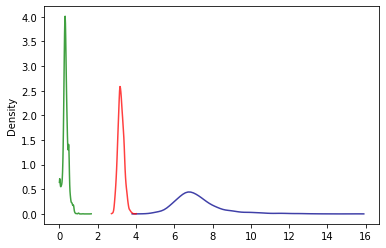

In [217]:
# This is in progress
# This is a probability distribution/density analysis

import matplotlib.pyplot as plt

_, bins = np.histogram(df['fixed acidity'], bins= 'auto')
#_, bins = np.histogram(df['pH'], bins= 'auto')
#plt.hist(df['fixed acidity'],bins= bins,color= 'b',density= True,alpha= 0.75,histtype= 'bar');
lineSP = np.linspace((np.min(bins)), (np.max(bins)), len(bins))
df['fixed acidity'].plot.kde(color= 'darkblue', ind=lineSP, alpha = 0.75)

_, bins = np.histogram(df['citric acid'], bins= 'auto')
lineSP = np.linspace((np.min(bins)), (np.max(bins)), len(bins))
df['citric acid'].plot.kde(color= 'green', ind=lineSP, alpha = 0.75)

_, bins = np.histogram(df['pH'], bins= 'auto')
lineSP = np.linspace((np.min(bins)), (np.max(bins)), len(bins))
df['pH'].plot.kde(color= 'red', ind=lineSP, alpha = 0.75)



In [202]:
# Data standardisation (data scaling) is applied below
# It is crucial when specific machine learning techniques are used (for more details see text section below)
# The MinMax function is used; For the reason look at the text section

scaler = MinMaxScaler(feature_range=(0,1))
Scaled_train =scaler.fit_transform(X_train)
print(Scaled_train)

[[0.23728814 0.08666667 0.23493976 ... 0.37795276 0.20224719 0.47933884]
 [0.22033898 0.17333333 0.12048193 ... 0.30708661 0.12921348 0.16528926]
 [0.29661017 0.08       0.26506024 ... 0.32283465 0.13483146 0.33057851]
 ...
 [0.30508475 0.11333333 0.21686747 ... 0.21259843 0.14606742 0.16528926]
 [0.22033898 0.1        0.19879518 ... 0.46456693 0.12359551 0.49586777]
 [0.26271186 0.22666667 0.12048193 ... 0.26771654 0.17977528 0.23140496]]
